In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wifi_matrix import generate_A_higher_order, generate_A
import matplotlib.pyplot as plt
from scipy.sparse.linalg import splu

In [2]:
wavelength = 0.06  # Wavelength of WiFi in meters: 0.12 for 2.5GHz; 0.06 for 5GHz.
k = 2 * np.pi / wavelength

In [23]:
X = np.linspace(-1, 1, 100, dtype=np.complex64)
Y = np.linspace(-2, 2, 100, dtype=np.complex64)
x, y = np.meshgrid(X, Y)

u = (1-x**2)*(4-y**2)
f = (k**2) * u - 2*((1-x**2) + (4-y**2))

# u = (1-np.exp(1-x**2))*(1-np.exp(4-y**2)) # Known solution
# f = k**2 * u + 2*x*(1-np.exp(4-y**2))*np.exp(1-x**2) + 2*y*(1-np.exp(1-x**2))*np.exp(4-y**2)# Analytic source

In [24]:
floor = np.ones_like(f)

In [25]:
A = generate_A_higher_order(floor,k)
B = generate_A(floor, k)
lu_A = splu(A)
lu_B = splu(B)
u_A = lu_A.solve(f.flatten())
u_B = lu_B.solve(f.flatten())

([], <a list of 0 Text yticklabel objects>)

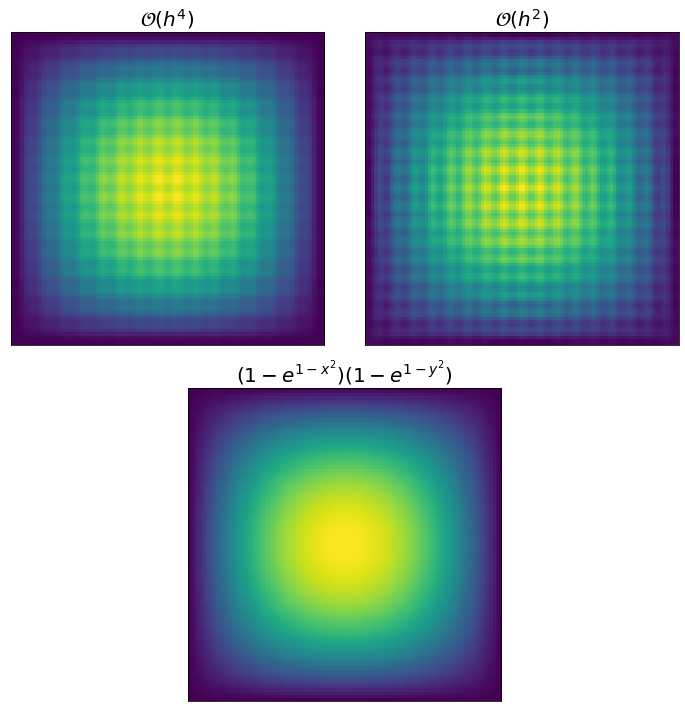

In [26]:
fig = plt.figure(figsize= (10,10),tight_layout=True)
ax=plt.subplot(212)
plt.imshow(np.abs(u))
plt.title(r"$(1-e^{1-x^2})(1-e^{1-y^2})$", size= 20)
plt.xticks([])
plt.yticks([])

plt.subplot(221)
plt.imshow(np.real(u_A.reshape(f.shape)))
plt.title(r"$\mathcal{O}(h^4)$", size= 20)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(np.real(u_B.reshape(f.shape)))
plt.title(r"$\mathcal{O}(h^2)$", size= 20)
plt.xticks([])
plt.yticks([])

0.272269
0.57533765


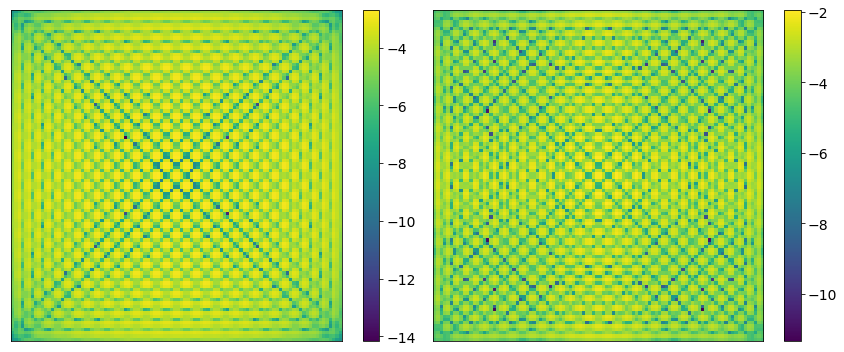

In [53]:
fig = plt.figure(figsize= (12,5),tight_layout=True)
# fig=plt.figure(tight_layout=True)
plt.subplot(121)
plt.imshow(np.log(np.abs(u-u_A.reshape(u.shape))/(np.max(np.abs(u)))), cmap = "viridis")
plt.xticks([])
plt.yticks([])
# plt.title(fr"$\max |\bar u - u| = ${np.max(np.abs(u-u_A.reshape(u.shape))):.4f}", size = 18)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='14')
print(np.max(np.abs(u-u_A.reshape(u.shape))))

plt.subplot(122)
plt.imshow(np.log(np.abs(u-u_B.reshape(u.shape))/(np.max(np.abs(u)))), cmap="viridis")
plt.xticks([])
plt.yticks([])
# plt.title(fr"$\max |\bar u - u| = ${np.max(np.abs(u-u_B.reshape(u.shape))):.4f}", size = 18)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize='14')
print(np.max(np.abs(u-u_B.reshape(u.shape))))

plt.savefig("bilder/diff_analytic_500.pdf")

In [133]:
# plt.figure(figsize=(20,10),tight_layout=True)

# plt.subplot(121)
# plt.imshow(np.log(np.abs(B.toarray())).reshape((25,25)), cmap='jet')
# plt.colorbar()
# plt.title(r"$\mathcal{O}(h^2)$", size= 20)

# plt.subplot(122)
# plt.imshow(np.log(np.abs(A.toarray())).reshape((25,25)), cmap='jet')
# plt.colorbar()
# plt.title(r"$\mathcal{O}(h^4)$", size= 20)